In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#%matplotlib inline

In [3]:
def read_source(fileSpec):
    with open(fileSpec) as source :
        yield from source

In [4]:
def drop_unwanted(lines):
    """
    Drop lines that are not wanted - ie those that do not
    match ai=-12.009,-12.042 and the unwanted part of the
    line, leaving just the first float
    """
    for line in lines :
        if line.startswith('ai'):  # for array
            a, b = line.split('=')
            c, d = b.split(',')
            yield d  # d is applanation, c is pressure

In [5]:
def drop_leaving_appln(lines, category='p'):
    """
    Drop lines that are not wanted - ie those that do not
    match ai2=-12.009,-12.042 and the unwanted part of the
    line, leaving just the first float
    """
    for line in lines :
        if line.startswith('ai3'):  # for array
            a, b = line.split('=')
            vals = b.split(',')  # tuple  pressure, applanation, raw appln
            if category == 'e':  # everything
                yield vals
            else:
                retval = vals[{'p':0, 'a':1, 'r':2}[category]]
                yield retval

In [6]:
def drop_leaving_appln(lines, category='p'):
    """
    Drop lines that are not wanted - ie those that do not
    contain applanation data, idetified by the .000000, in the middle
    """
    for line in lines :
        #print(line)
        if '.000000,' in line:  # for array
            #print(line)
            vals = line.split(',')  # tuple  pressure, applanation, raw appln
            if category == 'e':  # everything
                yield vals
            else:
                retval = vals[{'p':0, 'a':1, 'r':2}[category]]
                yield retval

In [7]:
def get_array(lines):
    """
    Extract lines starting with ai= and convert to an numpy array.
    Convert to a 2D array of length 500
    """
    data = np.fromiter(lines, float)
    length = data.size
    if length % 500:  # missing values
        print('missing items', length)
    return data.reshape((500,length // 500), order='F')

In [9]:
# filename = 'new code run 32.log'
# target = r'C:\Temp\Keeler\debugs\cd_fail_rept\\' + filename
filename = 'run 1.log'
target = r'C:\Temp\Keeler\debugs\m1666\\' + filename

newLines = read_source(target)
#wantedLines = drop_unwanted(newLines)
wantedLines = drop_leaving_appln(newLines, 'a')
the_data = get_array(wantedLines)
the_data

array([], shape=(500, 0), dtype=float64)

ZeroDivisionError: integer division or modulo by zero

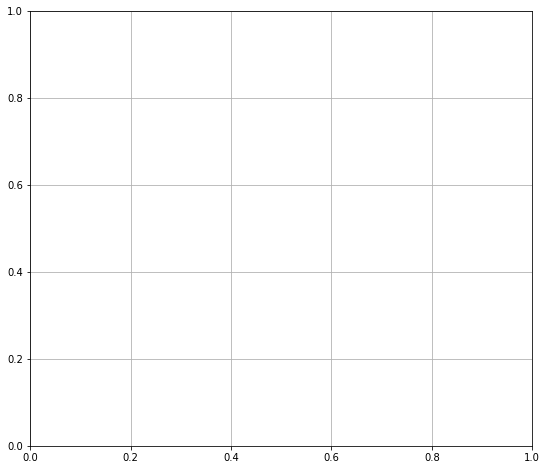

In [10]:
_ = plt.figure(figsize=(9, 8))
plt.grid()
_ = plt.plot(the_data[:,:], alpha=0.3)
#plt.savefig('c:/Temp/test.jpg')

In [9]:
maxes = np.amax(the_data,0) <30
mins = np.amin(the_data,0) < 45100
#mins

In [10]:
def keep_only_cal_pressures(lines, kind='m'):
    """
    Yield only the cal pressure values,
    These are on a line linke this 53.103,10.463,5080.122 with
    two commas
    similar lines from position have smaller values
    """
    for line in lines :
        if 'ai' in line or 'rac' in line :
            continue 
        if line.count(',') == 2:
            a, b, c = line.split(',')
            if float(a) > 20:
                if kind == 'p': yield a
                if kind == 'm': yield b
                if kind == 'o': yield c
                #yield b  # a = peak, b=press, c=appln peak

In [11]:
newLines = read_source(target)
peaks = keep_only_cal_pressures(newLines)

In [12]:
peaks_array = np.fromiter(peaks, float)

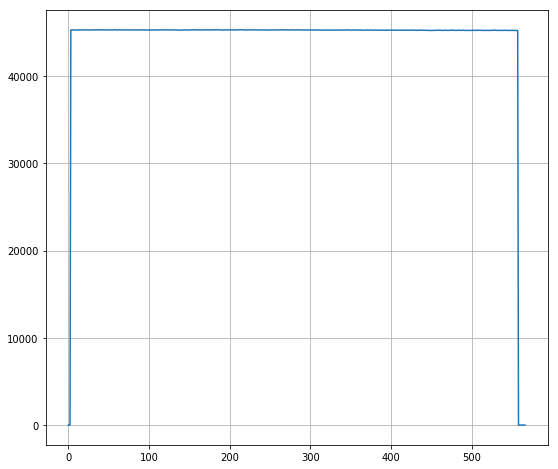

In [13]:
_ = plt.figure(figsize=(9, 8))
plt.grid()
_ = plt.plot(peaks_array)
plt.savefig('c:/Temp/cals.jpg')

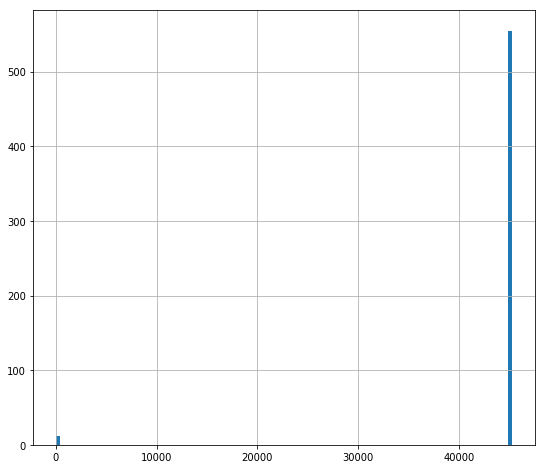

In [14]:
_ = plt.figure(figsize=(9, 8))
plt.grid()
_ = plt.hist(peaks_array, 100)

In [15]:
peaks_array.std(), peaks_array.mean(), peaks_array.min(), peaks_array.max()

(6518.2126150011154, 44327.405643738974, -1.0, 45328.0)

In [17]:
def get_raw_array(lines):
    """
    Extract lines strtign with rac= and split into the two
    values of corrected and raw pressure
    rac=10.744, 6.893
    As this is two interleaved arrays use a different
    approach from the iter one.
    """
    data = [a for a in lines]
    #print(data)
    return data


In [18]:
def keep_only_raw_and_corrected_pressures(lines):
    """
    Yield only the corrected and raw pressure values,
    These are on a line linke this 
    rac=10.744, 6.893
    """
    for line in lines :
        if line.startswith('rac='):
            a, b = line.split('=')
            c, d = b.split(',')
            yield (float(c), float(d))

In [35]:
def keep_only_peak_pressures(lines):
    """
    Yield only the peak pressure values,
    These are on a line linke this 53.103,10.463,5080.122 with
    two commas
    """
    for line in lines :
        if line.count(',') == 2:
            a, b, c = line.split(',')
            if float(a) > 10.0:
                yield b  # was a for peak

In [66]:
# filename = 'new code run 61.log'
# target = r'C:\Temp\Keeler\debugs\cd_fail_rept\\' + filename
filename = 'run 4.log'
target = r'C:\Temp\Keeler\debugs\m1666\\' + filename

newLines = read_source(target)

In [67]:
raws = keep_only_peak_pressures(newLines)

In [68]:
d=get_raw_array(raws)
na = np.array(d, dtype=np.float32);

23.667444

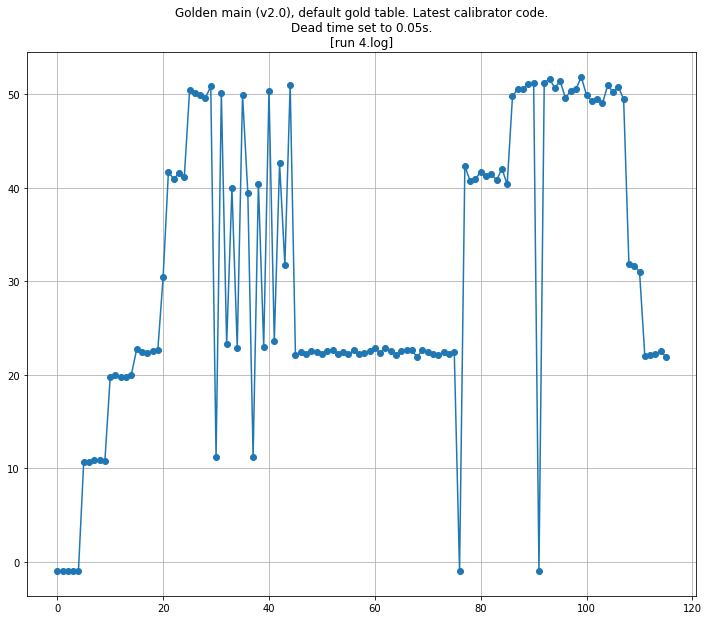

In [69]:
_ = plt.figure(figsize=(12, 10))
plt.grid()
tp = plt.plot(np.clip(na, None, 70), marker='o')
#plt.plot((0,2000), (53, 53))
plt.title(
    'Golden main (v2.0), default gold table. Latest calibrator code.\n'
    'Dead time set to 0.05s.\n[%s]' 
    % (filename,)
)
plt.savefig(r'C:\Temp\Keeler\debugs\m1666\\' + 'deadtime 50ms.jpg')

np.average(na[na<45])

In [34]:
na.shape
#verify = na[205:]
#meas = na[:205]
na

array([  1.06960001e+01,  -1.19500005e+00,   7.00000022e-03,
         1.06980000e+01,  -1.02699995e+00,   4.39999998e-02,
         1.08070002e+01,  -9.57000017e-01,   1.52999997e-01,
         1.96720009e+01,  -8.83000016e-01,   1.34000003e-01,
        -1.00000000e+00,  -8.00999999e-01,   2.73000002e-01,
         4.98940010e+01,  -1.01499999e+00,   7.80000016e-02,
         5.17719994e+01,  -9.71000016e-01,   3.00000003e-03,
         4.91040001e+01,  -9.43000019e-01,   6.40000030e-02,
         5.02739983e+01,  -9.08999979e-01,   1.08999997e-01,
         5.10219994e+01,  -6.38999999e-01,   2.09000006e-01,
         4.98969994e+01,  -9.06000018e-01,   1.65000007e-01,
         4.90890007e+01,  -1.02499998e+00,   6.70000017e-02,
         5.02089996e+01,  -7.51999974e-01,   2.94000000e-01,
         4.89630013e+01,  -9.78999972e-01,   8.39999989e-02,
         4.96730003e+01,  -1.02699995e+00,   1.86000004e-01,
         4.76879997e+01,  -9.53999996e-01,   8.79999995e-02,
         4.95449982e+01,

In [24]:
ver50 = verify[verify>45]
ver40 = verify[35<verify]
ver40 = ver40[ver40<45]

In [25]:
def separate_stats(arr):
    """
    Given an array which contains the results of a calibration, separate
    into 10..50 and print stats for each band.
    """
    results = ''
    for limit in range(10, 60, 10):
        data = arr[limit-5 < arr]
        data = data[data < limit+5]
        #print(limit, data.min(), data.mean(), data.max(), data.std())
        results += '%d, %.3f, %.3f, %.3f, %.3f\n' % (limit, data.min(), data.mean(), data.max(), data.std())
    return results


In [26]:
#print(separate_stats(verify))

In [27]:
#print(separate_stats(meas))

In [28]:
from ipywidgets import interactive

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    #plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

In [29]:
# import ipyvolume.pylab as p3# pythreejs # ipyvolume

In [30]:
round(1000.4)

1000

In [31]:
adc=50*290/8
bitsPermmHg = 290/8
round(((int(adc)) / bitsPermmHg)*1000)

49986

In [32]:
680*3/(2*3.14*880)

0.369137232194557

In [33]:
290/8


36.25

In [34]:
1812/36.2


50.055248618784525

In [35]:
std=290/8
std

36.25

In [36]:
65.535*std

2375.6437499999997

In [37]:
p='56'
[int(p) + ofset for ofset in  (-1, 0, 1)]

[55, 56, 57]

In [38]:
mps='0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3007,0,3027,3025,3025,3026,3033,3040,3033,3028,3022,3011,3022,3022,3028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0'

adcs = [int(a) for a in mps.split(',')]
len(adcs)

324

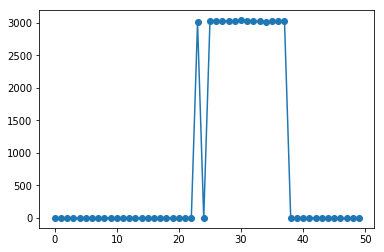

In [39]:
_ = plt.plot(adcs[225:275], marker='o')

In [40]:
ps = range(10,51,10)
MAIN_UNIT_PRESSURE_OFFSET = 0.0
MAIN_UNIT_SOFT_PUFF_PEAK = 34.0
MAIN_UNIT_HARD_SOFT_THRESHOLD = 25.0
OFFSET_MULTIPLIER_FOR_HARD_PUFF = 0.9
peak_adc_value = 4250
scale_factors = [(MAIN_UNIT_PRESSURE_OFFSET + p)/(MAIN_UNIT_PRESSURE_OFFSET + MAIN_UNIT_SOFT_PUFF_PEAK) for p in ps]
scaled_adcs = [scale_factor * peak_adc_value for scale_factor in scale_factors]
scaled_adcs, scale_factors

ps = range(10,51,10)
MAIN_UNIT_PRESSURE_OFFSET = 0.0
MAIN_UNIT_SOFT_PUFF_PEAK = 12+58.0
MAIN_UNIT_HARD_SOFT_THRESHOLD = 25.0
OFFSET_MULTIPLIER_FOR_HARD_PUFF = 0.9
peak_adc_value = 11150-3000
scale_factors = [(MAIN_UNIT_PRESSURE_OFFSET + p)/(MAIN_UNIT_PRESSURE_OFFSET + MAIN_UNIT_SOFT_PUFF_PEAK) for p in ps]
scaled_adcs = [scale_factor * peak_adc_value for scale_factor in scale_factors]
scaled_adcs, scale_factors

([1164.2857142857142,
  2328.5714285714284,
  3492.8571428571427,
  4657.142857142857,
  5821.428571428572],
 [0.14285714285714285,
  0.2857142857142857,
  0.42857142857142855,
  0.5714285714285714,
  0.7142857142857143])

In [229]:
def keep_calib(lines):
    """keep lines from the calibrator"""
    for line in lines:
        if line.count(',') > 10:
            last_comma = line.rfind(',')
            data = [int(v) for v in line[:last_comma].split(',')]
            yield data

run_number = 62
file_name = r'new code run %d.log' % run_number
target = r'C:\Temp\Keeler\debugs\cd_fail_rept\\' + file_name
newLines = read_source(target)
wanted_data = keep_calib(newLines)
arrays = [np.array(a, dtype=np.float32) for a in wanted_data]
shapes = [a.shape for a in arrays]
#print('shapes', shapes)
arr = np.stack(arrays, axis=1)
len(shapes)
EAC_ROLL_AV_SIZ = 124
FILTER_DELAY = (EAC_ROLL_AV_SIZ / 2)
TOTAL_GROUP_DELAY = 122
FLASH_LED_WAIT_TIME_SAMPLES = (TOTAL_GROUP_DELAY - FILTER_DELAY) 

_file_name = r'new code run 9.log'
_target = r'C:\Temp\Keeler\debugs\cd_fail_rept\\' + _file_name
_newLines = read_source(_target)
_wanted_data = keep_calib(_newLines)
_arrays = [np.array(a, dtype=np.float32) for a in _wanted_data]
_arr = np.stack(_arrays, axis=1)

ValueError: need at least one array to stack

((623, 155), 122.0, 501.0)

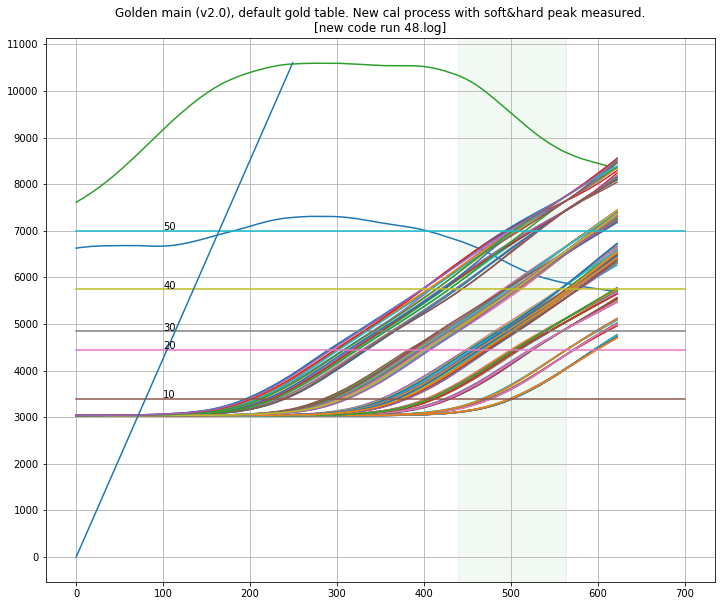

In [217]:
fig1 = plt.figure(figsize=(12, 10))
plt.grid()
#_ = plt.plot(np.clip(arr, 3000, None)[:,-50:])
_ = plt.plot(np.clip(arr, 3000, None))
#_ = plt.plot(np.clip(_arr, 3000, None))
# delay from middle average to end buffer
delay = FLASH_LED_WAIT_TIME_SAMPLES + FILTER_DELAY
thresh_x = arr.shape[0] - delay # middle of the average period
mk_y_min, mk_y_max = 3000, 6500

correct_thresholds = np.array([978, 2028, 2577, 3532, 4559])
correct_thresholds = np.array([1180, 2317, 2830, 3792, 4795])  # measured tuesday lunchtime
correct_thresholds = np.array([1192,2443,2762,3833,4897])  # after updating peak pressures
correct_thresholds = np.array([1182, 2312, 2793, 3763, 4818])
correct_thresholds = np.array([400, 1450, 1850, 2750, 4000])  # run 47

threshold_settings = correct_thresholds
#thresholds = [(t + 3030) for t in threshold_settings]
thresholds = [(t + 3000) for t in threshold_settings]
for i, t in enumerate(thresholds):
    plt.plot((0,700), (t, t))
    plt.annotate('%d' % (10 + i * 10,), xy=(100, t + 10), clip_on=True)

plt.title(
    'Golden main (v2.0), default gold table. New cal process with soft&hard peak measured.\n'
    'Initial levels estimated at 1/3 of the peak\n[%s]' 
    % (file_name,)
)

plt.title(
    'Golden main (v2.0), default gold table. New cal process with soft&hard peak measured.\n'
    '[%s]' 
    % (file_name,)
)
maxima = [arr[:,i].max() for i in range(arr.shape[1])]
maxima = maxima[1:]
#plt.axhspan(min(maxima), max(maxima), facecolor='g', alpha=0.15, edgecolor='k')

_maxima = [_arr[:,i].max() for i in range(_arr.shape[1])]
_maxima = _maxima[1:]
#plt.axhspan(min(_maxima), max(_maxima), facecolor='g', alpha=0.15, edgecolor='k')

plt.axvspan(thresh_x - FILTER_DELAY, thresh_x + FILTER_DELAY, facecolor='g', alpha=0.05, edgecolor='k')

axes = plt.gca()
#axes.set_xlim([0, 700])
#axes.set_ylim([3000, 9000])
axes.yaxis.set_major_locator(ticker.MultipleLocator(1000))

plt.savefig('c:/Temp/pressures new cd code run%d.jpg' % run_number )  #, dpi=600)
# print('Range of peak', max(maxima)-min(maxima), 'est', max(maxima)/2+min(maxima)/2)
# print(max(maxima))
arr.shape , delay, arr.shape[0] - delay

In [75]:
# This code block only if the whole 1024 array is captured
if 0:
    static_levels = arr[0:500,:]
    means = np.mean(static_levels, 0)
    ofset = static_levels - means
    rms = np.sqrt(np.mean(np.square(ofset), 0))
    mins = np.min(ofset, 0)
    maxs = np.max(ofset, 0)
    stds = np.std(ofset, 0)
    means = np.mean(ofset, 0)
    #all_stats = np.stack([rms, mins, maxs, stds, means], 1)
    #all_stats = zip((rms, mins, maxs, stds, means))
    for a in all_stats: print (a)
    print( rms, mins, maxs, stds, means)#rms#arr[0,0]
    #arr.dot(arr)#arr.shape
    #np.mean(arr, 0).shape
    #maxs
    #ofset
# code only for filtered capture
if 0:
    _ = plt.figure(figsize=(12, 10))
    plt.grid()
    arr[arr[:,:] == 0] = np.nan
    _ = plt.plot(arr*32)
    delay = FLASH_LED_WAIT_TIME_SAMPLES * 2 # delay in check dev is 62 samples
    #ave_half_width = 124 / 2
    flash_x = arr.shape[0] - delay
    plt.title(
        'FILTERED buffer. delay set to %d (normally %d)' 
        % (delay, FLASH_LED_WAIT_TIME_SAMPLES)
    )
    plt.savefig('c:/Temp/filtered test.jpg')
    np.max(arr)
FLASH_LED_WAIT_TIME_SAMPLES,FILTER_DELAY

(60.0, 62.0)

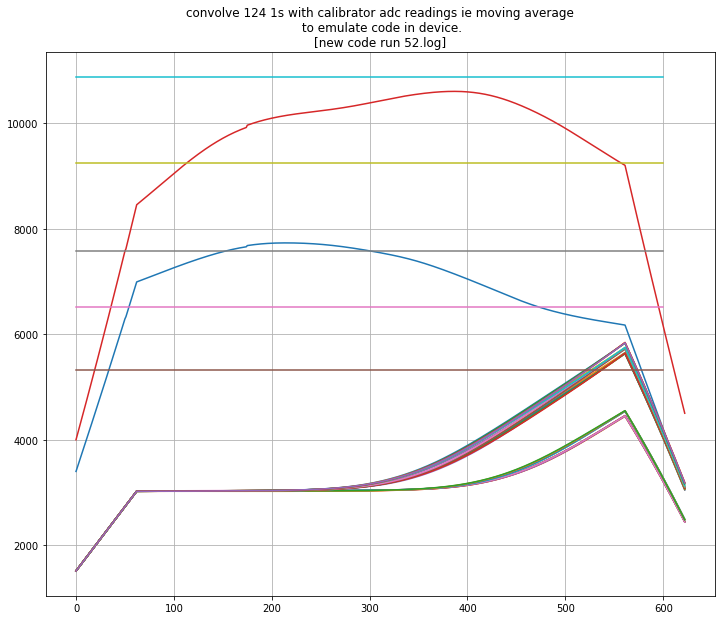

In [74]:
no_convolved = EAC_ROLL_AV_SIZ // 1
# can be full, same, valid
list_of_avs = [np.convolve(arr[:,i], np.ones((no_convolved,))/no_convolved, mode='same') for i in range(arr.shape[1])]
avs = np.stack(list_of_avs, axis=1)
_ = plt.figure(figsize=(12, 10))
plt.grid()
_ = plt.plot(avs)
thresh_x = int(avs.shape[0] - delay) # middle of the average period
plt.title('convolve %d 1s with calibrator adc readings ie moving average\n to emulate code in device.\n[%s]' % (no_convolved, file_name))
threshold_settings = [2314, 3508, 4579, 6238, 7877]
thresholds = [no_convolved * (t + 3030) for t in threshold_settings]
thresholds = [(t + 3000) for t in threshold_settings]
for t in thresholds:
    plt.plot((0,600), (t, t))
if 0:
    mk_y_min, mk_y_max = 200000, 800000
    plt.plot([thresh_x - FILTER_DELAY, thresh_x - FILTER_DELAY], [mk_y_min, mk_y_max], color='k', linestyle='-', linewidth=1)
    plt.plot([thresh_x + FILTER_DELAY, thresh_x + FILTER_DELAY], [mk_y_min, mk_y_max], color='k', linestyle='-', linewidth=1)
    plt.plot([thresh_x, thresh_x], [mk_y_min, mk_y_max], color='k', linestyle='-', linewidth=1)
    plt.annotate('threshold', xy=(thresh_x, mk_y_min ), clip_on=True)
    _ = plt.annotate('flash', xy=(thresh_x + FILTER_DELAY, mk_y_min), clip_on=True)

tick_spacing = 1
axes = plt.gca()
#axes.autoscale(True, 'both)')
if 0:
    axes.set_xlim([230, 250])
    axes.set_ylim([4500, 5000])
    axes.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#print([a.max() for a in list_of_avs])

In [ ]:
# calibrator had default values of 362,725,1088,1450,1812
# target is 124 * (362 + initial_offset)
# say 124 * (362+3050) = 
_ = plt.figure(figsize=(12, 10))
plt.grid()
for t in thresholds:
    plt.plot((0,100), (t, t))

flash_index = thresh_x
# The flash point is when the average first exceeds the threshold
# NOTE the threshold does vary from run to run as the dc level
# is checked each run
flash_adcs = avs[flash_index,:]
_ = plt.plot(flash_adcs, marker='o')
#flash_x = avs.shape[0] - 62  # delay in check dev is 62 samples
# plt.annotate('detected', xy=(250, 6080 ))
_ = plt.title('detected levels from convolving %d 1s with calibrator adc readings [%s]' % (no_convolved, file_name))
# _ = plt.plot([flash_x, flash_x], [3000, 6500], color='k', linestyle='-', linewidth=1)
flash_index
#thresh_x

In [ ]:
def find_over_threshold(ary, threshold):
    overs = []
    for i in range(ary.shape[1]):
        row = ary[:,i]
        over = row > threshold
        index_of_over = np.nonzero(over)
        overs.append( index_of_over[0][0])
    return overs

In [ ]:
no_convolved = 64  #EAC_ROLL_AV_SIZ
# can be full, same, valid
# Try analysing as separate instances for 50, 10 etc
a50s = [arr[:,i] for i in range(arr.shape[1]) if arr[:,i].max() > 6900]
a10s = [arr[:,i] for i in range(arr.shape[1]) if arr[:,i].max() < 5600]
targets = np.stack(a50s, axis=1)
threshold_settings = [362, 725, 1088, 1450, 1812]
threshold = threshold_settings[-1] + 3030


list_of_avs = [np.convolve(targets[:,i], np.ones((no_convolved,))/no_convolved, mode='same') for i in range(targets.shape[1])]
avs2 = np.stack(list_of_avs, axis=1)
_ = plt.figure(figsize=(12, 10))
plt.grid()
_ = plt.plot(avs2)
#thresh_x = int(avs2.shape[0] - delay) # middle of the average period
plt.title('convolve %d 1s with calibrator adc readings ie moving average [%s]' % (no_convolved, file_name))
plt.plot((0,400), (threshold, threshold))
detect_indices = find_over_threshold(avs2, threshold)
print(min(detect_indices), max(detect_indices), sum(detect_indices)/float(len(detect_indices)))

if 0:
    axes = plt.gca()
    axes.set_xlim([230, 250])
    axes.set_ylim([4800, 5000])
    tick_spacing = 10
    axes.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.savefig('c:/Temp/cd analysis.jpg')    
if 0:
    mk_y_min, mk_y_max = 1500, 8000
    plt.plot([thresh_x - FILTER_DELAY, thresh_x - FILTER_DELAY], [mk_y_min, mk_y_max], color='k', linestyle='-', linewidth=1)
    plt.plot([thresh_x + FILTER_DELAY, thresh_x + FILTER_DELAY], [mk_y_min, mk_y_max], color='k', linestyle='-', linewidth=1)
    plt.plot([thresh_x, thresh_x], [mk_y_min, mk_y_max], color='k', linestyle='-', linewidth=1)
    plt.annotate('threshold', xy=(thresh_x, mk_y_min ))
    _ = plt.annotate('flash', xy=(thresh_x + FILTER_DELAY, mk_y_min ))

In [ ]:
target = r'C:\Temp\Keeler\debugs\cd_testing\run 14.log'
#target = r'C:\Temp\Keeler\debugs\cal_process\run 65.log'

newLines = read_source(target)
peaks = keep_only_cal_pressures(newLines, 'm')
peaks_array = np.fromiter(peaks, float)
_ = plt.figure(figsize=(9, 8))
plt.grid()
axes = plt.gca()
#axes.set_xlim([950, 1000])
#axes.set_ylim([45, 55])
#plt.tight_layout()
_ = plt.plot(peaks_array)
plt.title('Updated CD code. 50 reps. Default tables 360, 4..-4. \n [%s]' % target)
plt.savefig('c:/Temp/cal_verify.jpg', dpi=600)

In [ ]:
4250/34., 8150/58.0

In [ ]:
8000/58, 4250/34

In [ ]:
137/125, 11150-3000

In [ ]:
plt.plot([17.8, 22.8, 40.8, 48.8, 55.9])

In [ ]:
plt.plot([17.9, 23.7, 31.5, 41, 49.7])

In [ ]:
correct_thresholds = np.array([978, 2028, 2577, 3532, 4559])
pressures = [10, 20, 30, 40, 50]
def calc_adc(pressure, peak_pressure, peak_adc, num, denom):
    scale_factor = (num + pressure) / (denom + peak_pressure);
    scaled_adc = scale_factor * peak_adc
    return scaled_adc
slope = (correct_thresholds.max() - correct_thresholds.min()) / 40
calculated_thresholds_34 = np.array([calc_adc(p, 34, 4250, 0, 12) for p in pressures])
calculated_thresholds_58 = np.array([calc_adc(p, 58, 8150, 0, 12) for p in pressures])
print(slope)
errs_34 = calculated_thresholds_34-correct_thresholds
print(errs_34.mean()/slope)
errs_34, calculated_thresholds_58-correct_thresholds

In [ ]:
# Peaks at 34, 58
correct_thresholds = np.array([1192,2443,2762,3833,4897])  # after updating peak pressures
(
    np.array([calc_adc(p, 34, 5000, 12, 12) for p in pressures[:2]]) - correct_thresholds[:2],
    np.array([calc_adc(p, 34, 5000, 0, 12) for p in pressures[:2]]) - correct_thresholds[:2],
    np.array([calc_adc(p, 34, 5000, 0, 0) for p in pressures[:2]]) - correct_thresholds[:2],
    np.array([calc_adc(p, 58, 7682, 12, 12) for p in pressures[2:]]) - correct_thresholds[2:],
    np.array([calc_adc(p, 58, 7682, 0, 12) for p in pressures[2:]]) - correct_thresholds[2:],
    np.array([calc_adc(p, 58, 7682, 0, 0) for p in pressures][2:]) - correct_thresholds[2:],
)

In [ ]:
# estimate peak values rather than use 34, 58
(
    np.array([calc_adc(p, 40, 5000, 12, 12) for p in pressures[:2]]) - correct_thresholds[:2],
    np.array([calc_adc(p, 40, 5000, 0, 12) for p in pressures[:2]]) - correct_thresholds[:2],
    np.array([calc_adc(p, 40, 5000, 0, 0) for p in pressures[:2]]) - correct_thresholds[:2],
    np.array([calc_adc(p, 75, 7682, 12, 12) for p in pressures[2:]]) - correct_thresholds[2:],
    np.array([calc_adc(p, 75, 7682, 0, 12) for p in pressures[2:]]) - correct_thresholds[2:],
    np.array([calc_adc(p, 75, 7682, 0, 0) for p in pressures][2:]) - correct_thresholds[2:],
)

In [ ]:
old_correct_thresholds = np.array([978, 2028, 2577, 3532, 4559])
new_correct_thresholds = np.array([1180, 2317, 2830, 3792, 4795])  # measured tuesday lunchtime
10/(12+34)

In [211]:
f=132/58
10*f, 20*f, 30*f, 40*f, 50*f

(22.758620689655174,
 45.51724137931035,
 68.27586206896552,
 91.0344827586207,
 113.79310344827587)